In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import pylab


"""
Podamos los grafo que solo tengan grado 1 ya que hemos partido de un influencer 
inicialy podemos sobreentender que todos siguen a ese (de esta manera ahorramos 
recursos facilitando los calculos)
"""
G = nx.read_gml('./grafo_con_poda.gml')
G = G.to_undirected()

In [2]:
print("Número de nodos:", G.number_of_nodes())
print("Número de aristas:", G.number_of_edges())

Número de nodos: 8273
Número de aristas: 23120


In [3]:
nx.is_connected(G) # Es un grafo conexo

True

In [5]:
grados = sorted(G.degree, key=lambda x: x[1], reverse=True)
mas_sociable = grados[0]
menos_sociable = grados[-1]

print("El usuario más sociable es:", mas_sociable)
print("El usuario menos sociable es:", menos_sociable)

El usuario más sociable es: ('1740037465761619968', 1293)
El usuario menos sociable es: ('835338751979159553', 2)


In [7]:
cliques = list(nx.find_cliques(G))
sorted(cliques, key = lambda x: len(x), reverse=True)[0]

['1687940719896322049',
 '332309033',
 '1761409012602372096',
 '1358504748505260043',
 '1716756536150704129']

In [13]:
diccionario_adyacencias = dict(G.adjacency())
lista_aristas = G.edges

# Estadísticas descriptivas de las redes

El objetivo de modelar la realidad en forma de redes complejas no es otro que entender y describir los fenómenos del mundo real de forma cuantitativa y cualitativa. Dicho de otra forma, **extraer conocimiento útil** mediante el análisis de las redes complejas.

Un conjunto de herramientas que nos sirve para alcanzar nuestro objetivo son las estadísticas descriptivas de una red, las cuales se pueden agrupar en:

- Medidas de **conectividad** de la red, que están directa o indirectamente relacionadas con el número de conexiones que tiene un nodo, así como con la estructura global de conexiones de la red.
- Medidas de **_motif_**, que cuentan la frecuencia de subgrafos específicos en una red; o dicho de otra forma, patrones de interconexión que se producen en las redes complejas en números significativamente superiores a los de las redes aleatorias ([fuente](https://www.science.org/doi/10.1126/science.298.5594.824)).
- Medidas de **posición**, relacionadas con el lugar que ocupan los nodos dentro de la red, así como la distancia entre ellos.

Además, en función de su ámbito podemos distinguir entre las medidas a **nivel de nodo**, o **locales**, y las medidas a **nivel de red**, o **globales**.

In [9]:
print(f"Grado medio de la red: {2*G.number_of_edges() / float(G.number_of_nodes()):.4f}")
print(f"Densidad de la red: {(2*G.number_of_edges() / float(G.number_of_nodes())) / float(G.number_of_nodes()):.4f}")


Grado medio de la red: 5.5893
Densidad de la red: 0.0007


<Axes: >

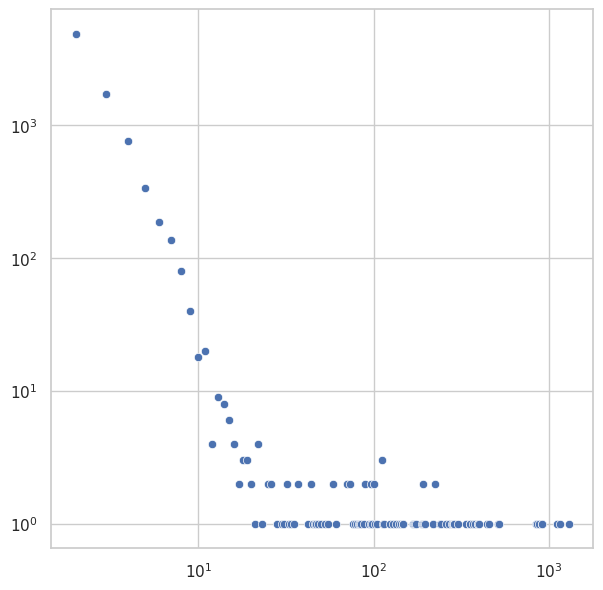

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
"""
    Mostramos la distribucion de los grafos de los nodos con escala logaritmica
"""
sns.set_theme(style="whitegrid")
grados = [d for n, d in G.degree()]

grados_ord = sorted(set(grados))
conteo = [grados.count(g) for g in grados_ord]
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.scatterplot(x=grados_ord, y=conteo, ax=ax)

In [22]:
coeficientes_clustering_local = nx.clustering(G) # cuantifica qué tanto esta de interconectado con sus vecinos 
coeficiente_clustering_global = nx.transitivity(G)
print(f"El coeficiente de clustering global es {coeficiente_clustering_global}")

El coeficiente de clustering global es 0.004536677149127547


In [26]:
l = dict(nx.all_pairs_shortest_path_length(G)) #DICCIONARIO CAMINO MÁS CORTO

In [25]:
diametro = nx.diameter(G)
print(f"El diámetro de la red es {diametro}")

El diámetro de la red es 13


In [27]:
excentricidad = nx.eccentricity(G, sp=l) # camino más largo que se puede realizar desde cada nodo

/home/pandita/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


El camino geodésico medio es: 4.31


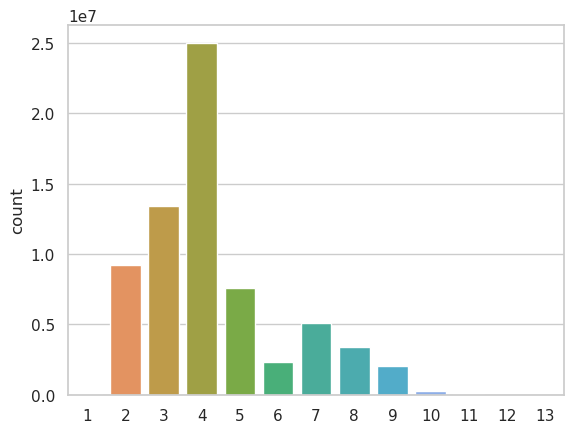

In [28]:
caminos = []
for i in l.keys():
    for j in l[i].keys():
        if l[i][j] != 0:
            caminos.append(l[i][j])

sns.countplot(x=caminos)

"""
    métrica a nivel global de la distancia media entre cualquier par de nodos seleccionados aleatoriamente
"""

print(f"El camino geodésico medio es: {nx.average_shortest_path_length(G):.2f}")

In [30]:
len(list(nx.connected_components(G))) # Es un grafo conexo, forma una única componente conexa

1

In [ ]:
print("Número de nodos:", G.number_of_nodes())
print("Número de aristas:", G.number_of_edges())

In [32]:
"""determinar si el comportamiento de nuestros datos han seguido un proceso aleatorio o no
Para ello calculamos el coeficiente de clustering medio, el grado medio y la densidad. Esto solo
nos dará una idea de la cercanía entre nuestra red y una aleatoria, comprobando si el histograma es 
parecido al de Possion sacaremos conclusiones más acertadas """
import numpy as np 
k = np.mean(grados)
n = G.number_of_nodes()

print(f"Coef. de clustering medio de la red: {nx.transitivity(G)}") 
print(f"Coef. de clustering medio de una red ER: {nx.transitivity(nx.erdos_renyi_graph(n, k/(n-1)))}") #coeficiente para una red ER con el mismo nº de nodos y un parámetro de probabilidad ajustado para que el grado medio sea similar al de la red de karate. 

print("\n")
print(f"Grado medio de la red: {2*G.number_of_edges() / float(G.number_of_nodes()):.4f}")
print(f"Grado medio de una red ER: {2*(nx.erdos_renyi_graph(n, k/(n-1))).number_of_edges() / float((nx.erdos_renyi_graph(n, k/(n-1))).number_of_nodes()):.4f}")

print("\n")
print(f"Densidad de la red: {(2*G.number_of_edges() / float(G.number_of_nodes())) / float(G.number_of_nodes()):.4f}")
print(f"Densidad de una red ER: {(2*(nx.erdos_renyi_graph(n, k/(n-1))).number_of_edges() / float((nx.erdos_renyi_graph(n, k/(n-1))).number_of_nodes())) / float((nx.erdos_renyi_graph(n, k/(n-1))).number_of_nodes()):.4f}")

Coef. de clustering medio de la red: 0.004536677149127547
Coef. de clustering medio de una red ER: 0.0007485205024443872


Grado medio de la red: 5.5893
Grado medio de una red ER: 5.5769


Densidad de la red: 0.0007
Densidad de una red ER: 0.0007


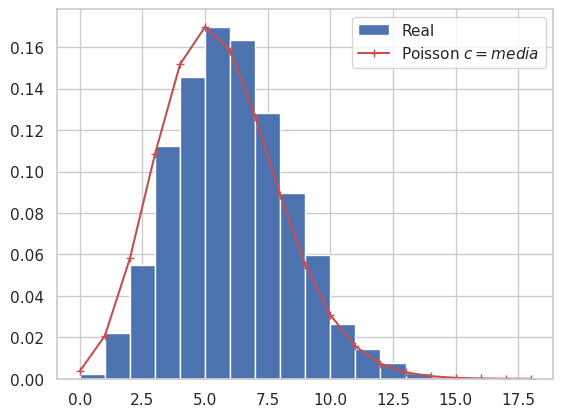

In [47]:
import networkx as nx
import random
import math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

"""
    Vamos a comparar metricas de una red aleatorio con la que tenemos
"""
k = np.mean(grados)

xs = list(range(min(grados), max(grados)+1))
plt.hist(grados, bins=xs, density=True, label='Real')
plt.plot(xs, [stats.poisson.pmf(s, k) for s in xs], 'r+-', label='Poisson $c= media $')
plt.legend(loc="upper right")
plt.show()

In [51]:
# Aplicar un algoritmo de detección de comunidades (por ejemplo, Louvain)
comunidades = nx.algorithms.community.modularity_max.greedy_modularity_communities(G) #el algoritmo de louvain encuentra comunidades maximizando la modularidad

# Mostrar el número de comunidades identificadas
print("Número de comunidades encontradas:", len(comunidades))

# Mostrar los nodos en cada comunidad
for i, comunidad in enumerate(comunidades):
    print(f"Comunidad {i+1}: {len(comunidad)} nodos")
    print("Nodos:")
    #for node in comunidad:
    #    print(node)
    print() 

Número de comunidades encontradas: 12
Comunidad 1: 3146 nodos
Nodos:

Comunidad 2: 1642 nodos
Nodos:

Comunidad 3: 1555 nodos
Nodos:

Comunidad 4: 668 nodos
Nodos:

Comunidad 5: 541 nodos
Nodos:

Comunidad 6: 306 nodos
Nodos:

Comunidad 7: 203 nodos
Nodos:

Comunidad 8: 157 nodos
Nodos:

Comunidad 9: 40 nodos
Nodos:

Comunidad 10: 9 nodos
Nodos:

Comunidad 11: 3 nodos
Nodos:

Comunidad 12: 3 nodos
Nodos:

